In [1]:
# Wang, Jixin et al. “Pan-Cancer Proteomics Analysis to Identify Tumor-Enriched and Highly Expressed Cell Surface Antigens as Potential Targets for Cancer Therapeutics.”
# Molecular & cellular proteomics : MCP vol. 22,9 (2023)
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10494184/
# https://zenodo.org/records/7991979

In [2]:
# CPTAC_FragPipe_TMT_TPA_v01
# Alberto Bejarano 2024

In [3]:
# intensity-based absolute quantification (iBAQ)
# tandem mass tag (TMT) 
# total protein approach (TPA)
# TMT-TPA
# TMT-iBAQ

In [4]:
import time; start = time.time()
from datetime import datetime; print(datetime.now().strftime("%B %d, %Y %H:%M:%S"))

June 05, 2024 20:25:40


In [5]:
#!pip install pyreadr
#!pip uninstall seaborn
#!pip install seaborn==0.11.2

In [22]:
import pandas as pd
pd.set_option('display.precision', 2)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
#        -         -        -        -         -        -         -        -        -         -
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator
from statannot import add_stat_annotation
from openpyxl import load_workbook
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns; print(sns.__version__) # Install version 0.11.2
import numpy as np
import pyreadr
import re
#        -         -        -        -         -        -         -        -        -         -
import warnings; warnings.filterwarnings("ignore") 
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

0.11.2


In [7]:
GenesOfInterest = ["TP53", "MYC"]
GenesOfInterest = ['MSLN', 'RAB5A', 'RAB5B', 'ERBB3', 'ERBB2', 'CTLA4']

In [8]:
datasetss =[('BRCA_N_TMT_Absolute_Abundances',  'BRCA',  'Normal'), ('BRCA_T_TMT_Absolute_Abundances',  'BRCA',  'Tumor'),
            ('ccRCC_N_TMT_Absolute_Abundances', 'ccRCC', 'Normal'), ('ccRCC_T_TMT_Absolute_Abundances', 'ccRCC', 'Tumor'),
            ('COAD_N_TMT_Absolute_Abundances',  'COAD',  'Normal'), ('COAD_T_TMT_Absolute_Abundances',  'COAD',  'Tumor'),
            ('GBM_N_TMT_Absolute_Abundances',   'GBM',   'Normal'), ('COAD_T_TMT_Absolute_Abundances',  'GBM',   'Tumor'),
            ('HNSCC_N_TMT_Absolute_Abundances', 'HNSCC', 'Normal'), ('HNSCC_T_TMT_Absolute_Abundances', 'HNSCC', 'Tumor'),
            ('LSCC_N_TMT_Absolute_Abundances',  'LSCC',  'Normal'), ('LSCC_T_TMT_Absolute_Abundances',  'LSCC',  'Tumor'),
            ('LUAD_N_TMT_Absolute_Abundances',  'LUAD',  'Normal'), ('LUAD_T_TMT_Absolute_Abundances',  'LUAD',  'Tumor'),
            ('OV_N_TMT_Absolute_Abundances',    'OV',    'Normal'), ('OV_T_TMT_Absolute_Abundances',    'OV',    'Tumor'),
            ('PDA_N_TMT_Absolute_Abundances',   'PDA',   'Normal'), ('PDA_T_TMT_Absolute_Abundances',   'PDA',   'Tumor'),
            ('UCEC_N_TMT_Absolute_Abundances',  'UCEC',  'Normal'), ('UCEC_T_TMT_Absolute_Abundances',  'UCEC',  'Tumor'),
           ]

In [9]:
'''
prot_exp = []
path = './data/TMT-TPA/'
custom_bar_format = "{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}, {rate_fmt}, {percentage:3.0f}%]"
#        -         -        -        -         -        -         -        -        -         -
for datafile, tumortype, tissuetype in tqdm(datasetss, leave=False, bar_format=custom_bar_format, colour='green'):
    try:
        result = pyreadr.read_r(path + datafile + '.RData')
        keys = list(result.keys()); #print(f"Keys in {datafile}: {keys}")
        if keys:
            df = result[keys[0]]
            df_filtered = df[df["Gene"].isin(GenesOfInterest)]
            df_filtered["TumorType"]  = tumortype
            df_filtered["TissueType"] = tissuetype
            cols = {'Normal': 'Sample', 'Tumor': 'Sample'}
            df_filtered.rename(columns=cols, inplace=True)
            prot_exp.append(df_filtered)
            #print(f"Filtered data for {datafile}:")
            #print(df_filtered.head(5))
        else:
            print(f"No data found in {datafile}")
    except KeyError as k:
        print(f"{datafile} KeyError: {k}")
    except pyreadr.librdata.LibrdataError as e:
        #print(f"\033[91m{datafile} LibrdataError: {e}\033[0m")
        print(f"\033[47m\033[91m{datafile} LibrdataError: {e}\033[0m")
    except Exception as e:
        print(f"An unexpected error occurred with {datafile}: {e}")
prot_exp_df = pd.concat(prot_exp, ignore_index=True)'''

'\nprot_exp = []\npath = \'./data/TMT-TPA/\'\ncustom_bar_format = "{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}, {rate_fmt}, {percentage:3.0f}%]"\n#        -         -        -        -         -        -         -        -        -         -\nfor datafile, tumortype, tissuetype in tqdm(datasetss, leave=False, bar_format=custom_bar_format, colour=\'green\'):\n    try:\n        result = pyreadr.read_r(path + datafile + \'.RData\')\n        keys = list(result.keys()); #print(f"Keys in {datafile}: {keys}")\n        if keys:\n            df = result[keys[0]]\n            df_filtered = df[df["Gene"].isin(GenesOfInterest)]\n            df_filtered["TumorType"]  = tumortype\n            df_filtered["TissueType"] = tissuetype\n            cols = {\'Normal\': \'Sample\', \'Tumor\': \'Sample\'}\n            df_filtered.rename(columns=cols, inplace=True)\n            prot_exp.append(df_filtered)\n            #print(f"Filtered data for {datafile}:")\n            #print(df_filtered.head(5))\n      

In [10]:
#prot_exp_df.to_csv('buffer.tsv',   sep="\t", index=False)
prot_exp_df = pd.read_csv('buffer.tsv', header=0, sep='\t', quotechar='"', on_bad_lines = "warn")

In [11]:
prot_exp_df.head()

,Sample,Protein,Gene,TMT_Global_TPA2_Molar,TMT_Median_TPA2_Molar,TumorType,TissueType
0,N01BR027,P01106,MYC,NaN,NaN,BRCA,Normal
1,N01BR027,P04637,TP53,398783.55,199373.81,BRCA,Normal
2,N05BR029,P01106,MYC,NaN,NaN,BRCA,Normal
3,N05BR029,P04637,TP53,403768.45,262623.10,BRCA,Normal
4,N11BR006,P01106,MYC,NaN,NaN,BRCA,Normal


In [12]:
prot_exp_df.dtypes

Sample                    object
Protein                   object
Gene                      object
TMT_Global_TPA2_Molar    float64
TMT_Median_TPA2_Molar    float64
TumorType                 object
TissueType                object
dtype: object

In [13]:
print(len(prot_exp_df))
#prot_exp_df = prot_exp_df.head(200)
print(len(prot_exp_df))

2854
2854


In [14]:
palette = sns.color_palette("pastel")

In [15]:
hue_order = ["Normal", "Tumor"]

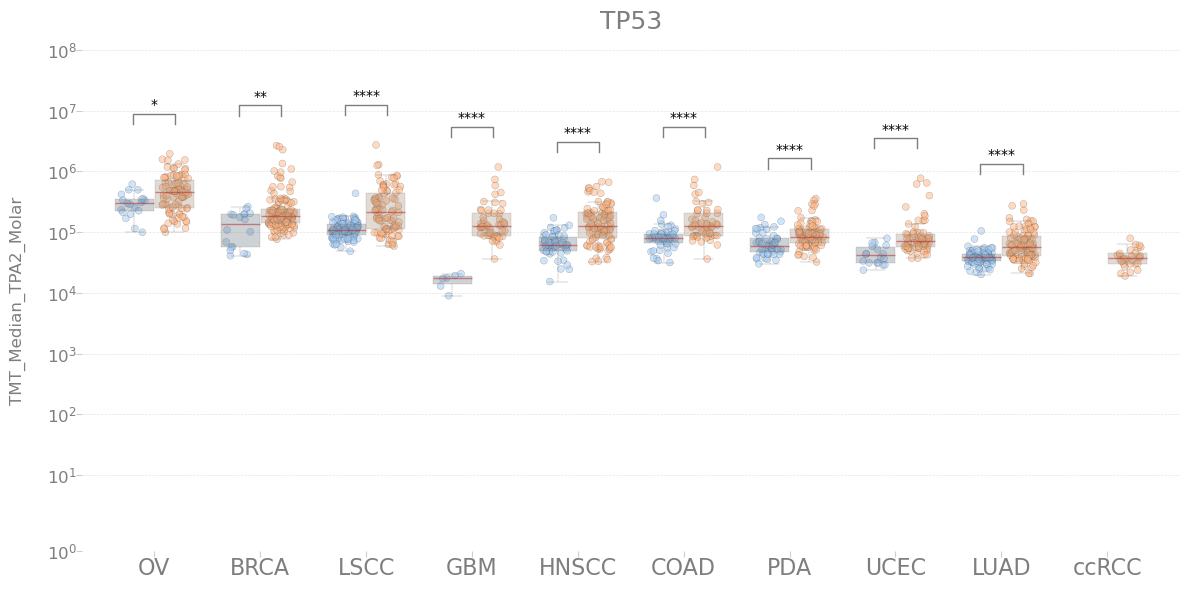

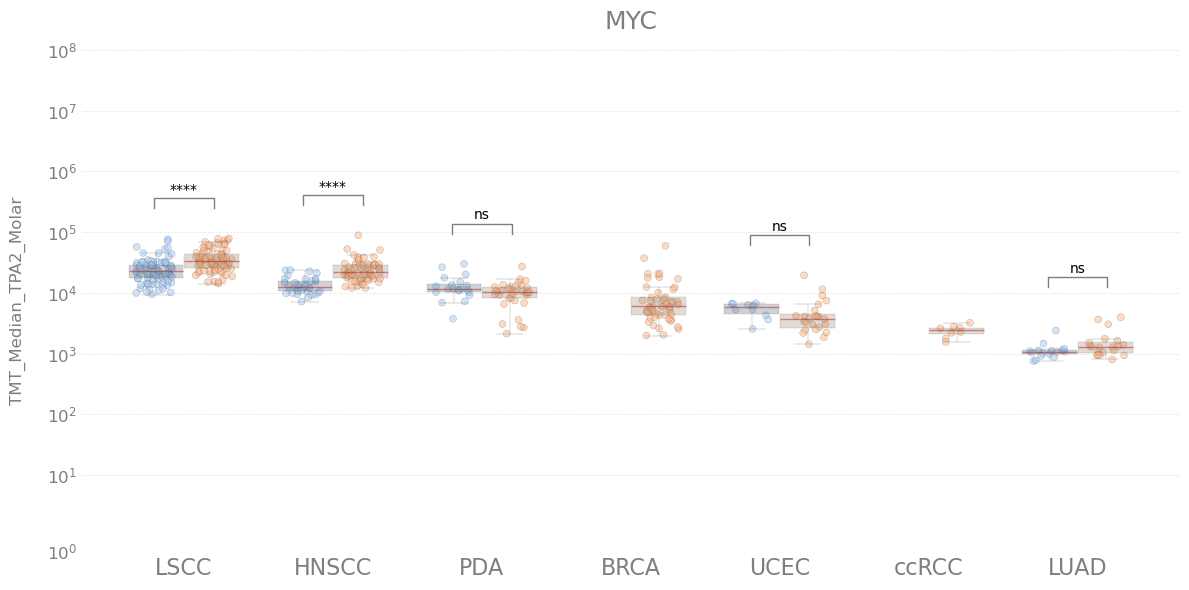

CPU times: total: 6.78 s
Wall time: 6.95 s


In [16]:
%%time
for gene in GenesOfInterest:
    fig, ax = plt.subplots(figsize=(12, 6)); plt.subplots_adjust(wspace=0.02, hspace=0.01)
    sns.plotting_context("notebook", font_scale = 2)
    #        -         -        -        -         -        -         -        -        -         -        -        -         -    
    data = prot_exp_df[prot_exp_df['Gene'] == gene]
    data.dropna(subset = ['TMT_Median_TPA2_Molar'], inplace=True)
    #        -         -        -        -         -        -         -        -        -         -        -        -         -
    unique_cancer_types = data['TumorType'].unique(); pairs = []
    for cancer_type in unique_cancer_types:
        unique_labels = data[data['TumorType'] == cancer_type]['TissueType'].unique(); #print(cancer_type, unique_labels)
        if "Normal" in unique_labels and "Tumor" in unique_labels:
            pairs.append(((cancer_type, "Normal"), (cancer_type, "Tumor"))); # print(pairs)
    #        -         -        -        -         -        -         -        -        -         -        -        -         -
    median_df = data.groupby(['TumorType'])['TMT_Median_TPA2_Molar'].median().sort_values(ascending=False).reset_index()
    order = median_df.TumorType.tolist()
    #        -         -        -        -         -        -         -        -        -         -        -        -         -
    data=data; x="TumorType"; y = "TMT_Median_TPA2_Molar"; hue='TissueType'; hue_order=hue_order
    #        -         -        -        -         -        -         -        -        -         -        -        -         -   
    annot_kws1 = {'pairs':pairs, 'data':data, 'x':x, 'y':y, 'order':order, 'hue':hue, 'hue_order':hue_order}
    annot_params = {"test":"Mann-Whitney", "line_width":1, "color":"#7E7E7E", "text_format":"star", 'loc':'inside'}
    #        -         -        -        -         -        -         -        -        -         -        -        -         -   
    str_kws = {'s':5, 'jitter':.25, 'alpha':0.5, 'dodge':True, 'linewidth':0.2,'edgecolor':'#1E1E1E','palette':palette,
               'order':order, 'hue':hue, 'hue_order':hue_order}
    box_kws = {'linewidth':0.5, 'width':0.75, 'dodge':True, 'showcaps':True, 'whis':1.5, 'fliersize':0, 'saturation':0.20, 
               'order':order, 'hue_order':hue_order}
    mprops=dict(linestyle='-', linewidth=1, color="firebrick", alpha=0.5); cprops=dict(linestyle="-", alpha=.5, linewidth=.3);
    bprops=dict(linestyle="-", alpha=.3, linewidth=.3); wprops=dict(linestyle="--", linewidth=.3, color="#7E7E7E");
    #        -         -        -        -         -        -         -        -        -         -        -        -         -   
    plt.gca().set_yscale('symlog'); plt.ylim(1E0, 1E8) 
    g = sns.stripplot(data=data, x=x, y=y, zorder=0, **str_kws, ax=ax)   
    g = sns.boxplot(data=data,x=x, y=y, hue=hue, medianprops=mprops, capprops=cprops, boxprops=bprops, whiskerprops=wprops, **box_kws, zorder=1, ax=ax)
    #        -         -        -        -         -        -         -        -        -         -        -        -         -     
    try:
        ax, test_results = Annotator(ax, **annot_kws1).reset_configuration().configure(**annot_params, verbose=0).apply_and_annotate()
    except Exception as e:
        print(f"An unexpected error occurred with {gene}: {e}")
    #        -         -        -        -         -        -         -        -        -         -        -        -         -    
    ax.set_title(gene, fontsize=18, pad=15, color='#7E7E7E')
    plt.xlabel("", labelpad=10); plt.ylabel("TMT_Median_TPA2_Molar", fontsize=12, labelpad=15, color='#7E7E7E') 
    #        -         -        -        -         -        -         -        -        -         -        -        -         -     
    plt.rcParams['xtick.bottom'] = False; plt.rcParams['ytick.left'] = False
    sns.despine(left=True, bottom=True)     
    #        -         -        -        -         -        -         -        -        -         -        -        -         -  
    kws_lines = {"ls":"--", "alpha":0.2, "linewidth":0.5, 'color':"#7E7E7E"}; exponents = range(0, 9)
    for exp in exponents:
        y_value = 10 ** exp; plt.axhline(y=y_value, **kws_lines)
    #        -         -        -        -         -        -         -        -        -         -        -        -         -     
    ax.tick_params(axis="x", colors="#cfcfcf", pad=0, length=4); ax.tick_params(axis="y", colors="#cfcfcf", pad=0, length=4)
    plt.yticks(fontsize=12, color="#7E7E7E", rotation=0, ha="center"); ax.tick_params(axis='y', which='major', pad=10)
    plt.setp(ax.xaxis.get_majorticklabels(), fontsize=16, color="#7E7E7E", rotation=0, rotation_mode='default'); dx = -10/150; dy = -10/150 
    #          -          -          -          -          -          -          -          -          -          -          - 
    plt.legend([],[],frameon=False)
    plt.tight_layout();
    plt.show(); #plt.close()
    #plt.savefig("tcga.png", format="png", bbox_inches="tight", dpi=300)

In [17]:
pairs = [
    (('BRCA',"Normal"),('BRCA',"Tumor")),
    (('ccRCC',"Normal"),('ccRCC',"Tumor")),
    (('COAD',"Normal"),('COAD',"Tumor")),
    (('GBM',"Normal"),('GBM',"Tumor")), 
    (('HNSCC',"Normal"),('HNSCC',"Tumor")),
    (('LSCC',"Normal"),('LSCC',"Tumor")),
    (('LUAD',"Normal"),('LUAD',"Tumor")),
    (('OV',"Normal"),('OV',"Tumor")),  
    (('PDA',"Normal"),('PDA',"Tumor")), 
    (('UCEC',"Normal"),('UCEC',"Tumor"))
    
]

In [18]:
data_log = prot_exp_df.apply(lambda x: np.log(x + 1) if np.issubdtype(x.dtype, np.number)else x)

In [19]:
palette = {'Tumor':'#d74a49', 'Normal':'#3ea908'}
kws1 = {'s':10, 'alpha':0.25, 'linewidth':0.5,'edgecolor':'#1E1E1E', 'palette':palette}
scatter_kws= {'s':6, 'alpha':0.25, 'edgecolor':'#1E1E1E'}; line_kas= {'color': 'red', 'alpha':0.25, 'lw':1};

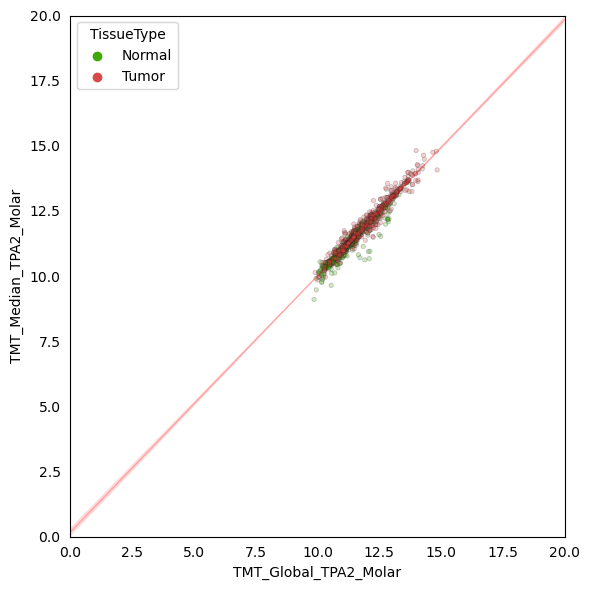

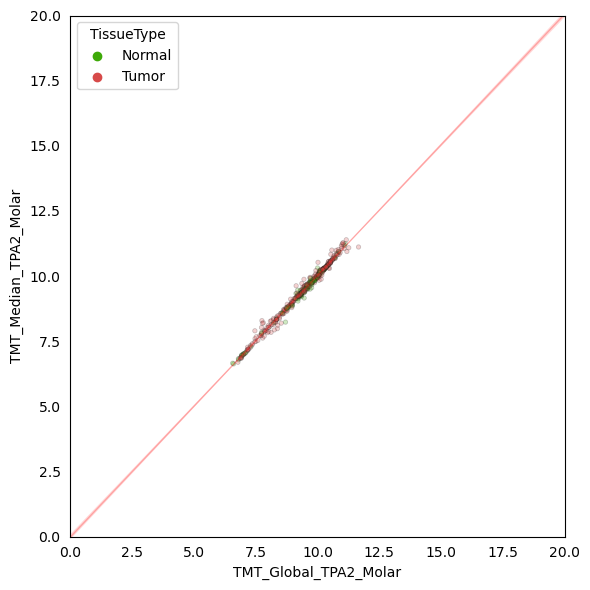

CPU times: total: 2.58 s
Wall time: 1.4 s


In [20]:
%%time
for gene in GenesOfInterest:
    fig, ax = plt.subplots(figsize=(6, 6)); plt.subplots_adjust(wspace=0.02, hspace=0.01)
    sns.plotting_context("notebook", font_scale = 2)
    #        -         -        -        -         -        -         -        -        -         -        -        -         -    
    data = data_log[data_log['Gene'] == gene]
    
    plt.gca().set_xscale('linear'); plt.xlim(0, 20) 
    plt.gca().set_yscale('linear'); plt.ylim(0, 20)    
    sns.scatterplot(data=data, x="TMT_Global_TPA2_Molar", y="TMT_Median_TPA2_Molar", hue='TissueType', **kws1, ax=ax)
    sns.regplot(data=data,     x="TMT_Global_TPA2_Molar", y="TMT_Median_TPA2_Molar", scatter=False, fit_reg=True, ci=95, truncate=False,
                scatter_kws=scatter_kws, line_kws=line_kas, ax=ax)

    plt.tight_layout()
    plt.show()
    plt.close()

In [21]:
print("'CPTAC_FragPipe_TMT_TPA_v01' script run time:", f'{time.time()-start:.0f}', "seconds.")

'CPTAC_FragPipe_TMT_TPA_v01' script run time: 17 seconds.
